# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = None, names = columns))


In [3]:
fires_dt

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
4,8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0,6.44
514,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0,54.29
515,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
516,1,4,aug,sat,94.4,146,614.7,11.3,25.6,42,4,0,0


# Get X and Y

Create the features data frame and target data.

In [4]:
# delete the first row of the dataframe with headers
fires_dt_1 = fires_dt.iloc[1: , :]
fires_dt_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 1 to 517
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   coord_x  517 non-null    object
 1   coord_y  517 non-null    object
 2   month    517 non-null    object
 3   day      517 non-null    object
 4   ffmc     517 non-null    object
 5   dmc      517 non-null    object
 6   dc       517 non-null    object
 7   isi      517 non-null    object
 8   temp     517 non-null    object
 9   rh       517 non-null    object
 10  wind     517 non-null    object
 11  rain     517 non-null    object
 12  area     517 non-null    object
dtypes: object(13)
memory usage: 52.6+ KB


In [5]:
#features data
X = fires_dt_1.drop(columns = 'area')

#target variable
Y = fires_dt_1['area']

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


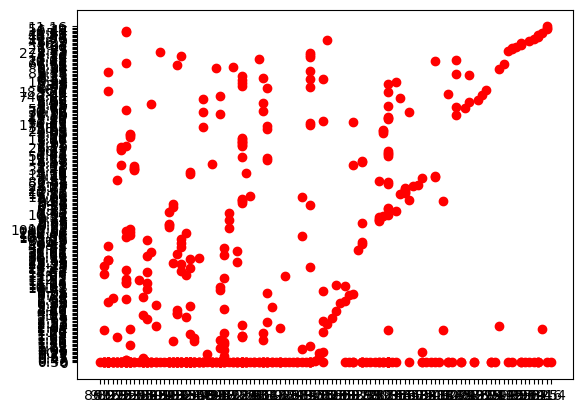

In [6]:
#'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 

import matplotlib.pyplot as plt
plt.scatter(X['ffmc'],Y,c='r')
plt.show()

### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [7]:
# preproc1
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.preprocessing import OneHotEncoder

num_cols = ['coord_x','coord_y','ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']

cat_cols = ['month', 'day']

pipe_num_transforms = Pipeline([
    ('standardizer', StandardScaler())
])

pipe_cat_transforms = Pipeline([
    ('transform',OneHotEncoder(drop = 'if_binary',handle_unknown='ignore'))
])

transform_1 = ColumnTransformer([
    ('num_transforms', pipe_num_transforms, num_cols),
    ('cat_transforms', pipe_cat_transforms, cat_cols),
])

pipe_1 = Pipeline([
    ('Preproc1', transform_1)
])
pipe_1


Pipeline(steps=[('Preproc1',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('transform',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['month', 'day'])]))])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [8]:
# preproc2

num_cols = ['coord_x','coord_y', 'wind', 'rain']

cat_cols = ['month', 'day']

num_cols_xj = ['ffmc', 'dmc', 'dc', 'isi', 'temp','rh']

pipe_num_simple = Pipeline([
    ('standardizer', StandardScaler())
])

pipe_num_xj = Pipeline([
    ('standardizer', StandardScaler()),
    ('transform', PowerTransformer(method='yeo-johnson'))
])

pipe_cat_transforms = Pipeline([
    ('transform',OneHotEncoder(drop = 'if_binary',handle_unknown='ignore'))
])

transform_2 = ColumnTransformer([
    ('num_transforms', pipe_num_transforms, num_cols),
    ('num_transforms_xj', pipe_num_xj ,num_cols_xj),
    ('cat_transforms', pipe_cat_transforms, cat_cols),
])

pipe_2 = Pipeline([
    ('Preproc2', transform_2)
])
pipe_2

Pipeline(steps=[('Preproc2',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'wind',
                                                   'rain']),
                                                 ('num_transforms_xj',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler()),
                                                                  ('transform',
                                                                   PowerTransformer())]),
                                                  ['ffmc', 'dmc', 'dc', 'isi',
                                                   'temp', 'rh']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('transform',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['month', 'day'])]))])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [9]:
# Pipeline A = preproc1 + baseline
from sklearn.neighbors import KNeighborsRegressor

pipe_A = Pipeline([
    ('preprocessing', pipe_1),
    ('clf', KNeighborsRegressor())
])
pipe_A

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('Preproc1',
                                  ColumnTransformer(transformers=[('num_transforms',
                                                                   Pipeline(steps=[('standardizer',
                                                                                    StandardScaler())]),
                                                                   ['coord_x',
                                                                    'coord_y',
                                                                    'ffmc',
                                                                    'dmc', 'dc',
                                                                    'isi',
                                                                    'temp',
                                                                    'rh',
                                                                    'wind',
                                                                    'rain']),
                                                                  ('cat_transforms',
                                                                   Pipeline(steps=[('transform',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown='ignore'))]),
                                                                   ['month',
                                                                    'day'])]))])),
                ('clf', KNeighborsRegressor())])

In [10]:
#Pipeline B = preproc2 + baseline

pipe_B = Pipeline([
    ('preprocessing', pipe_2),
    ('clf', KNeighborsRegressor())
])
pipe_B

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('Preproc2',
                                  ColumnTransformer(transformers=[('num_transforms',
                                                                   Pipeline(steps=[('standardizer',
                                                                                    StandardScaler())]),
                                                                   ['coord_x',
                                                                    'coord_y',
                                                                    'wind',
                                                                    'rain']),
                                                                  ('num_transforms_xj',
                                                                   Pipeline(steps=[('standardizer',
                                                                                    StandardScaler()),
                                                                                   ('transform',
                                                                                    PowerTransformer())]),
                                                                   ['ffmc',
                                                                    'dmc', 'dc',
                                                                    'isi',
                                                                    'temp',
                                                                    'rh']),
                                                                  ('cat_transforms',
                                                                   Pipeline(steps=[('transform',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown='ignore'))]),
                                                                   ['month',
                                                                    'day'])]))])),
                ('clf', KNeighborsRegressor())])

In [11]:
# Pipeline C = preproc1 + advanced model
from sklearn.ensemble import RandomForestRegressor

pipe_C = Pipeline([
    ('preprocessing', pipe_1),
    ('clf', RandomForestRegressor())
])
pipe_C

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('Preproc1',
                                  ColumnTransformer(transformers=[('num_transforms',
                                                                   Pipeline(steps=[('standardizer',
                                                                                    StandardScaler())]),
                                                                   ['coord_x',
                                                                    'coord_y',
                                                                    'ffmc',
                                                                    'dmc', 'dc',
                                                                    'isi',
                                                                    'temp',
                                                                    'rh',
                                                                    'wind',
                                                                    'rain']),
                                                                  ('cat_transforms',
                                                                   Pipeline(steps=[('transform',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown='ignore'))]),
                                                                   ['month',
                                                                    'day'])]))])),
                ('clf', RandomForestRegressor())])

In [12]:
# Pipeline D = preproc2 + advanced model
pipe_D = Pipeline([
    ('preprocessing', pipe_2),
    ('clf', RandomForestRegressor())
])
pipe_D

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('Preproc2',
                                  ColumnTransformer(transformers=[('num_transforms',
                                                                   Pipeline(steps=[('standardizer',
                                                                                    StandardScaler())]),
                                                                   ['coord_x',
                                                                    'coord_y',
                                                                    'wind',
                                                                    'rain']),
                                                                  ('num_transforms_xj',
                                                                   Pipeline(steps=[('standardizer',
                                                                                    StandardScaler()),
                                                                                   ('transform',
                                                                                    PowerTransformer())]),
                                                                   ['ffmc',
                                                                    'dmc', 'dc',
                                                                    'isi',
                                                                    'temp',
                                                                    'rh']),
                                                                  ('cat_transforms',
                                                                   Pipeline(steps=[('transform',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown='ignore'))]),
                                                                   ['month',
                                                                    'day'])]))])),
                ('clf', RandomForestRegressor())])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [21]:
# split the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

#metric used for performance checks
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

scores = ['neg_root_mean_squared_error','r2','neg_mean_absolute_error']

In [22]:
from sklearn.model_selection import GridSearchCV

knn_param_grid = {
 'clf__n_neighbors': [3,5,10],
 'clf__weights': ['distance','uniform']
 } 

grid_cv_A = GridSearchCV(
    estimator=pipe_A, 
    param_grid=knn_param_grid,
    scoring = scores, 
    cv = 5,
   refit = 'neg_root_mean_squared_error')
grid_cv_A.fit(X_train, Y_train)

print(grid_cv_A.best_params_)

{'clf__n_neighbors': 3, 'clf__weights': 'distance'}


In [23]:
knn_param_grid = {
 'clf__n_neighbors': [3,5,10],
 'clf__weights': ['distance','uniform']
 } 

grid_cv_B = GridSearchCV(
    estimator=pipe_B, 
    param_grid=knn_param_grid,
    scoring = scores, 
    cv = 5,
   refit = 'neg_root_mean_squared_error')
grid_cv_B.fit(X_train, Y_train)

print(grid_cv_B.best_params_)


{'clf__n_neighbors': 3, 'clf__weights': 'distance'}


In [24]:
rndfrst_param_grid = {
 'clf__n_estimators' : [100,150],
 'clf__criterion': ['squared_error','absolute_error','friedman_mse'],
 'clf__bootstrap' : [False,True],
 'clf__max_features' : ['sqrt','log2'] 
 } 

grid_cv_C = GridSearchCV(
    estimator=pipe_C, 
    param_grid=rndfrst_param_grid,
    scoring = scores, 
    cv = 5,
   refit = 'neg_root_mean_squared_error')
grid_cv_C.fit(X_train, Y_train)

print(grid_cv_C.best_params_)


{'clf__bootstrap': True, 'clf__criterion': 'absolute_error', 'clf__max_features': 'log2', 'clf__n_estimators': 100}


In [25]:
rndfrst_param_grid = {
 'clf__n_estimators' : [100,150],
 'clf__criterion': ['squared_error','absolute_error','friedman_mse'],
 'clf__bootstrap' : [False,True],
 'clf__max_features' : ['sqrt','log2'] 
 } 

grid_cv_D = GridSearchCV(
    estimator=pipe_D, 
    param_grid=rndfrst_param_grid,
    scoring = scores, 
    cv = 5,
   refit = 'neg_root_mean_squared_error')
grid_cv_D.fit(X_train, Y_train)

print(grid_cv_D.best_params_)

{'clf__bootstrap': True, 'clf__criterion': 'absolute_error', 'clf__max_features': 'sqrt', 'clf__n_estimators': 100}


# Evaluate

+ Which model has the best performance?

In [26]:
res = pd.DataFrame(grid_cv_A.cv_results_)
res = res.loc[(res['param_clf__n_neighbors'] == 3) &(res['param_clf__weights'] == 'distance') ]
res[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_test_neg_root_mean_squared_error',
     'std_test_neg_root_mean_squared_error','mean_test_r2','std_test_r2','mean_test_neg_mean_absolute_error','std_test_neg_mean_absolute_error']]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,mean_test_r2,std_test_r2,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error
0,0.012552,0.00144,0.05155,0.042115,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
res = pd.DataFrame(grid_cv_B.cv_results_)
res = res.loc[(res['param_clf__n_neighbors'] == 3) &(res['param_clf__weights'] == 'distance') ]
res[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_test_neg_root_mean_squared_error',
     'std_test_neg_root_mean_squared_error','mean_test_r2','std_test_r2','mean_test_neg_mean_absolute_error','std_test_neg_mean_absolute_error']]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,mean_test_r2,std_test_r2,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error
0,0.032202,0.004569,0.036639,0.00278,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
res = pd.DataFrame(grid_cv_C.cv_results_)
res = res.loc[(res['param_clf__bootstrap'] == True) &(res['param_clf__criterion'] == 'absolute_error') & 
              (res['param_clf__max_features'] == 'log2') & (res['param_clf__n_estimators'] == 150)  ]

res[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_test_neg_root_mean_squared_error',
     'std_test_neg_root_mean_squared_error','mean_test_r2','std_test_r2','mean_test_neg_mean_absolute_error','std_test_neg_mean_absolute_error']]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,mean_test_r2,std_test_r2,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error
19,0.585059,0.028397,0.017573,0.001951,-43.826538,25.244121,-0.258053,0.267677,-17.152109,4.797798


In [29]:
res = pd.DataFrame(grid_cv_D.cv_results_)
res = res.loc[(res['param_clf__bootstrap'] == True) &(res['param_clf__criterion'] == 'absolute_error') & 
              (res['param_clf__max_features'] == 'log2') & (res['param_clf__n_estimators'] == 150)  ]

res[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_test_neg_root_mean_squared_error',
     'std_test_neg_root_mean_squared_error','mean_test_r2','std_test_r2','mean_test_neg_mean_absolute_error','std_test_neg_mean_absolute_error']]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,mean_test_r2,std_test_r2,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error
19,0.649726,0.049059,0.021629,0.002459,-43.847808,25.352433,-0.252124,0.252275,-17.43338,5.207755


By comparing the R-squared, mean absolute errors, root mean squared errors model C is the best performing model.
Also fit times of model C is slightly less than model D. But only 26% of the variance in data is explained by the model C.

# Export

+ Save the best performing model to a pickle file.

In [37]:
# save the model to pickle file
import pickle

best_model = pipe_C.set_params(**grid_cv_C.best_params_).fit(X_train,Y_train)

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [38]:
import shap
data_transform = pipe_C.named_steps['preprocessing'].transform(X_test)

explainer = shap.TreeExplainer(
    pipe_C.named_steps['clf'], 
    data_transform,
    feature_names = pipe_C.named_steps['preprocessing'].get_feature_names_out()
    )

shap_values = explainer(data_transform, check_additivity=False)

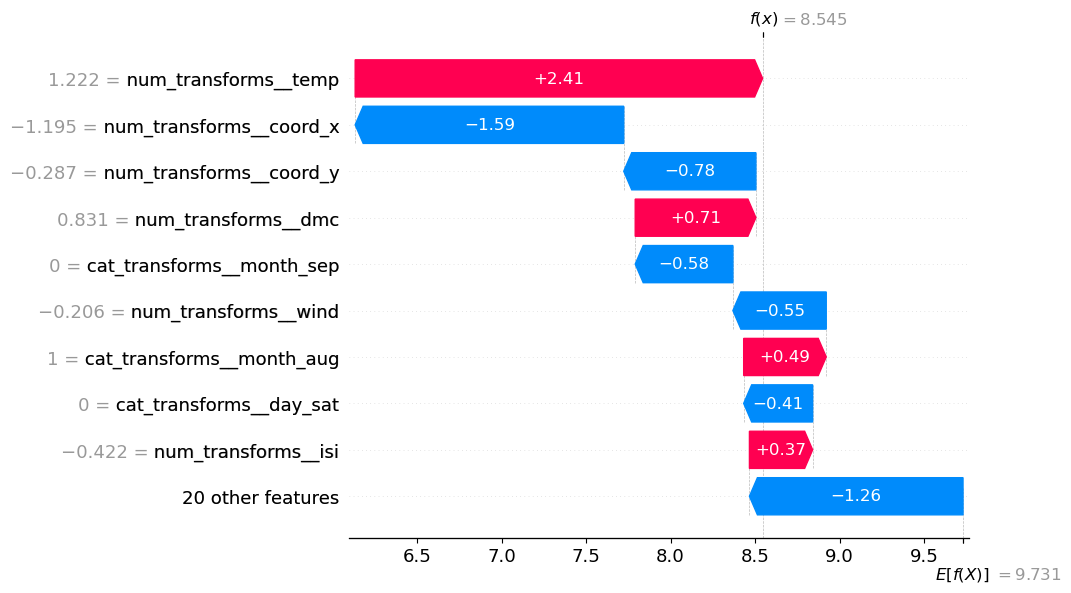

In [39]:
shap.plots.waterfall(shap_values[10])

In [40]:
import shap
data_transform = pipe_C.named_steps['preprocessing'].transform(X_train)

explainer = shap.TreeExplainer(
    pipe_C.named_steps['clf'], 
    data_transform,
    feature_names = pipe_C.named_steps['preprocessing'].get_feature_names_out()
    )

shap_values1 = explainer(data_transform, check_additivity=False)

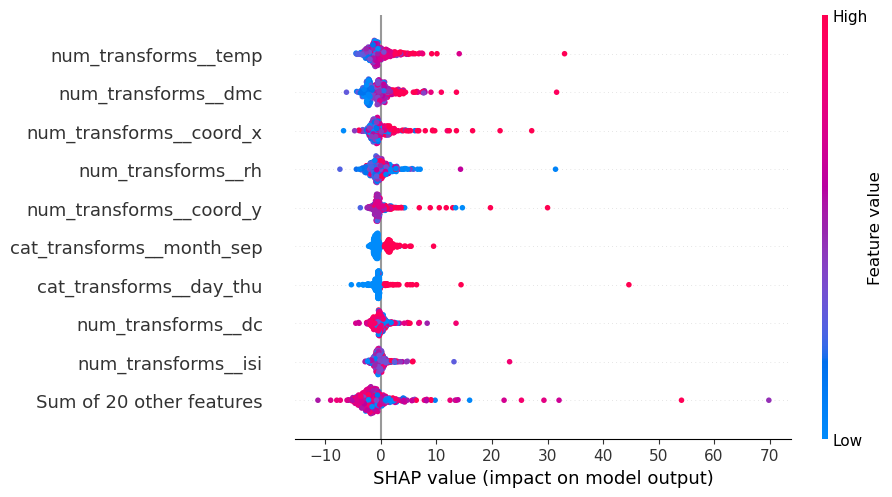

In [41]:
shap.plots.beeswarm(shap_values1)

*(Answer here.)*

Observation 10's prediction is mainly influenced by 3 features namely num_transforms__coord_x, num_transform_temp and num_transforms__coord_Y. The num_transforms__coord_x and num_transforms__coord_Y decreases the  area affected by forest fires whereas temperature increases the area affected by forest fires.

num_transforms__dmc, num_transform_temp, num_transforms__coord_Y  and num_transforms__coord_x  show significant impacts with positive SHAP values. num_transform_rh also has a low feature value but it has a high impact on the model.

The least important features are not listed in the plot, but the "Sum of 20 other features" category at the bottom suggests that there are many features with relatively small individual impacts.

Based on the SHAP plot, features falling under the "Sum of 20 other features" category will be considered for removal.Because 
individually these features will contribute less to the models performance.

To test wheather removal of these features improve the model's performance refit the model and compare the performance metrics of original model and new model.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.